## 앙상블 학습(Ensemble Learning)

<img src="https://velog.velcdn.com/images/newnew_daddy/post/c3059ab7-cd9e-4ffe-b3f6-43d529773445/image.png" width="70%">

- 여러 개의 학습 모델을 결합하여 단일 모델보다 더 나은 예측 성능을 얻는 기계 학습 기법
- 개별 모델이 가지는 약점을 보완하고, 예측 결과의 정확성과 안정성을 높이는 데 효과적
- 앙상블 모델의 예측 성능이 일반적으로 개별 성능보다 우수

#### 앙상블 학습의 종류
- Voting
- Bagging
- Boosting
- Stacking

#### 보팅(Voting)
- 다른 알고리즘이 낸 결과값들을 놓고 투표를 통해 최종 결과를 결정하는 방식
- Voting 방법
  - Hard Voting : 다수의 모델이 예측한 결과값을 최종 결과로 선정
  - Soft Voting : 모든 모델이 예측한 레이블 값의 결정 확률 평균을 구한 뒤 가장 확률이 높은
레이블 값을 최종 결과로 선정

![](https://velog.velcdn.com/images/newnew_daddy/post/1f1fb051-9015-4b22-93fe-c618270f747b/image.png)

https://continuous-development.tistory.com/entry/MLDL-%EC%95%99%EC%83%81%EB%B8%94-%ED%95%99%EC%8A%B5-Ensemble-Learning-2-Voting%EB%B3%B4%ED%8C%85%EC%9D%B4%EB%9E%80-1

#### Voting 분류기 실습

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('./dataset/wheat.csv')

df.columns = ['A','B','C','D','E','F','G','target']

df.head()

,A,B,C,D,E,F,G,target
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [8]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### VotingClassifier 메소드의 주요 인자 설명

```python
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define individual models
log_clf = LogisticRegression(max_iter=1000, random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

# Define the VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),  # 'lr'은 Logistic Regression 모델의 별칭
        ('dt', tree_clf), # 'dt'은 Decision Tree 모델의 별칭
        ('svc', svm_clf)  # 'svc'는 Support Vector Classifier 모델의 별칭
    ],
    voting='soft',       # 'hard' 또는 'soft' 중 선택. 'soft'는 확률 기반, 'hard'는 다수결 투표
    weights=[1, 1, 1],   # 각 모델의 가중치. 'soft' voting에서 확률에 가중치를 부여할 때 사용
    flatten_transform=True  # True로 설정 시, 예측 결과를 2차원 배열로 변환
)

```

In [11]:
# Define individual models
log_clf = LogisticRegression(max_iter=100, random_state=42)
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
svm_clf = SVC(probability=True, random_state=42)

# Define the VotingClassifier with soft voting
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', tree_clf), ('svc', svm_clf)],
    voting='soft'  # 'soft' voting uses predicted probabilities for voting
)

# Fit the model
voting_clf.fit(X_train, y_train)

# Predict using the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble model accuracy: {accuracy:.2f}")

Ensemble model accuracy: 0.94


In [12]:
## BaggingClassifier 모델 성능 평가

print(voting_clf.score(X_train, y_train))
print(voting_clf.score(X_test, y_test))

0.9726027397260274
0.9365079365079365


Accuracy: 0.937
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.89      0.89        19
           2       1.00      1.00      1.00        21
           3       0.91      0.91      0.91        23

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63

Confusion Matrix:
[[17  0  2]
 [ 0 21  0]
 [ 2  0 21]]
--------------------------------------------------


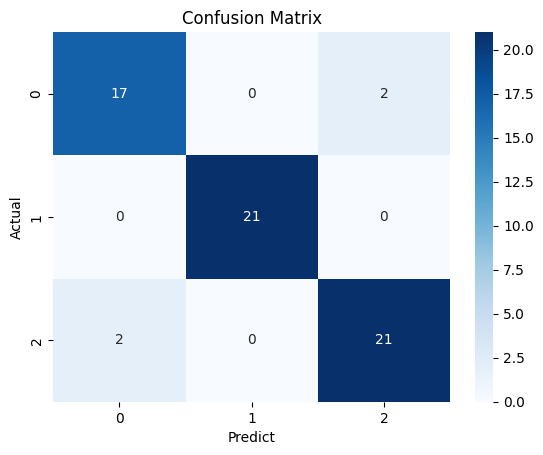

In [13]:
from utils import evaluate_cls_model

evaluate_cls_model(y_test, y_pred, False)

In [14]:
# For comparison, evaluate individual models
for clf in (log_clf, tree_clf, svm_clf):
    clf.fit(X_train, y_train)
    y_pred_individual = clf.predict(X_test)
    accuracy_individual = accuracy_score(y_test, y_pred_individual)
    print(f"{clf.__class__.__name__} accuracy: {accuracy_individual:.2f}")

LogisticRegression accuracy: 0.92
DecisionTreeClassifier accuracy: 0.92
SVC accuracy: 0.94
